# Introduction to Scikit-Learn: Machine Learning with Python
Scikit-learn is a popular package containing a collection of tools for machine learning. See more at <http://scikit-learn.org>

## The Scikit-learn Estimator Object
Every algorithm is exposed in scikit-learn via an **estimator** object. For example, a linear regression is implemented as so:

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
model = LinearRegression(normalize=True)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


**Estimated model parameters**: when data is *fit* with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore.

## Example 1
### a classification task: a dividing boundary between two clusters of data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

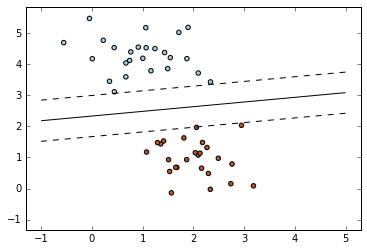

In [100]:
from sklearn.datasets.samples_generator import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the linear model with Stochastic Gradient Descent (SGD) learning
clf = SGDClassifier(loss="hinge", alpha=0.01,
                    n_iter=200, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1,x2]])
    Z[i, j] = p[0]

levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'

ax = plt.axes()
ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
ax.axis('tight')

## Example 2
### a regression task: a simple best-fit line to a set of data

In [89]:
from sklearn.linear_model import LinearRegression

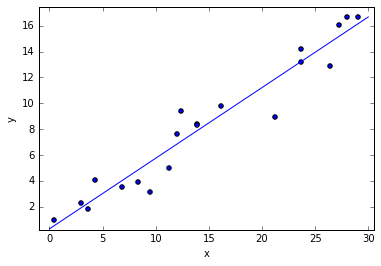

In [101]:
a = 0.5
b = 1.0

# x from 0 to 10
x = 30 * np.random.random(20)

# y = a*x + b with noise
y = a * x + b + np.random.normal(size=x.shape)

# create a linear regression classifier
clf = LinearRegression()
clf.fit(x[:, None], y)



# plot the results
ax = plt.axes()
ax.scatter(x, y)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = clf.predict(x_new[:, None])
ax.plot(x_new, y_new)

## Representation of Data in Scikit-learn
1. Machine learning is about creating models from data.

2. Most machine learning algorithms implemented in scikit-learn expect data to be stored in **2-d array or matrix**.

3. The size of the array is expected to be ```[n_samples,n_features]```.
    - ```n_samples```: the number of samples that describe with a fixed set of quantitative traits
    - ```n_features```: the number of features or traits that are used to describe a sample

![Representation of Data](fig/data-layout.png)
(Figure from the [Python Data Science Handbook](https://github.com/jakevdp/PythonDataScienceHandbook))

### A toy example (Iris dataset) 

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.keys()

dict_keys(['target_names', 'data', 'DESCR', 'feature_names', 'target'])

In [4]:
iris.data.shape

(150, 4)

In [97]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [98]:
iris.data[0:4]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2]])

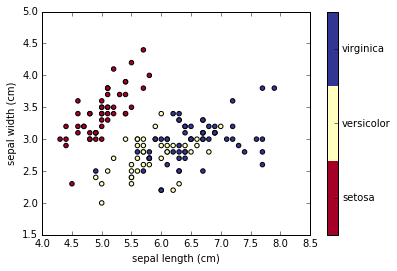

In [95]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.show()

**Change** ```x_index``` ** and ** ```y_index``` **in the above script and find a combination of two parameters which best separate the 3 classes**